<a href="https://colab.research.google.com/github/Mejayyy/AnomalyDet/blob/main/AD_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install pyod
!pip install scikit-learn
!pip install --upgrade pyod torch torchvision torchaudio
import os
os.environ["TORCH_DYNAMO_DISABLE"] = "1"

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score as ras
from scipy.io import loadmat
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from sklearn.metrics import confusion_matrix

from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score

In [74]:
from re import VERBOSE
#Ex 1.1
cont=0.25


x_train,x_test,y_train,y_test= generate_data(n_train=300 ,n_test=200, n_features=3,contamination=cont)

print(x_train.shape)

#Ex 1.2

#Definesc o fct pentru Balanced Accuracy
def BA(Y,Y_pred):
  cm = confusion_matrix(Y, Y_pred)

  TN, FP, FN, TP = cm.ravel()

  TPR = TP / (TP + FN)
  TNR = TN / (TN + FP)

  balanced_accuracy = (TPR + TNR) / 2
  return balanced_accuracy

def Model(model,kernel='linear',cont=cont,n_features=3,hidden_neurons=[64,32],hidden_activation='relu',dropout_rate=0.2,gamma='auto',nu=0.5):
  if model==OCSVM:
    model=model(kernel=kernel,contamination=cont,gamma=gamma,nu=nu)
  elif model==DeepSVDD:
    model=model(contamination=cont,n_features=n_features,
                hidden_neurons=hidden_neurons,
                hidden_activation=hidden_activation,
                dropout_rate=dropout_rate,
                verbose=0,
                )
  model.fit(x_train)

  y_train_pred=model.labels_

  y_test_pred=model.predict(x_test)
  y_test_scores = model.decision_function(x_test)


  #BA Pentru test
  balanced_accuracy_test = BA(y_test,y_test_pred)
  auc_score = ras(y_test, y_test_scores)

  return balanced_accuracy_test, auc_score,y_train_pred,y_test_pred


ba,auc,y_train_pred,y_test_pred=Model(OCSVM)

print("\nPentru OCSVM:\n Balanced Accuracy = {}\n AUC = {}".format(ba,auc))



(300, 3)

Pentru OCSVM:
 Balanced Accuracy = 0.96
 AUC = 0.9952


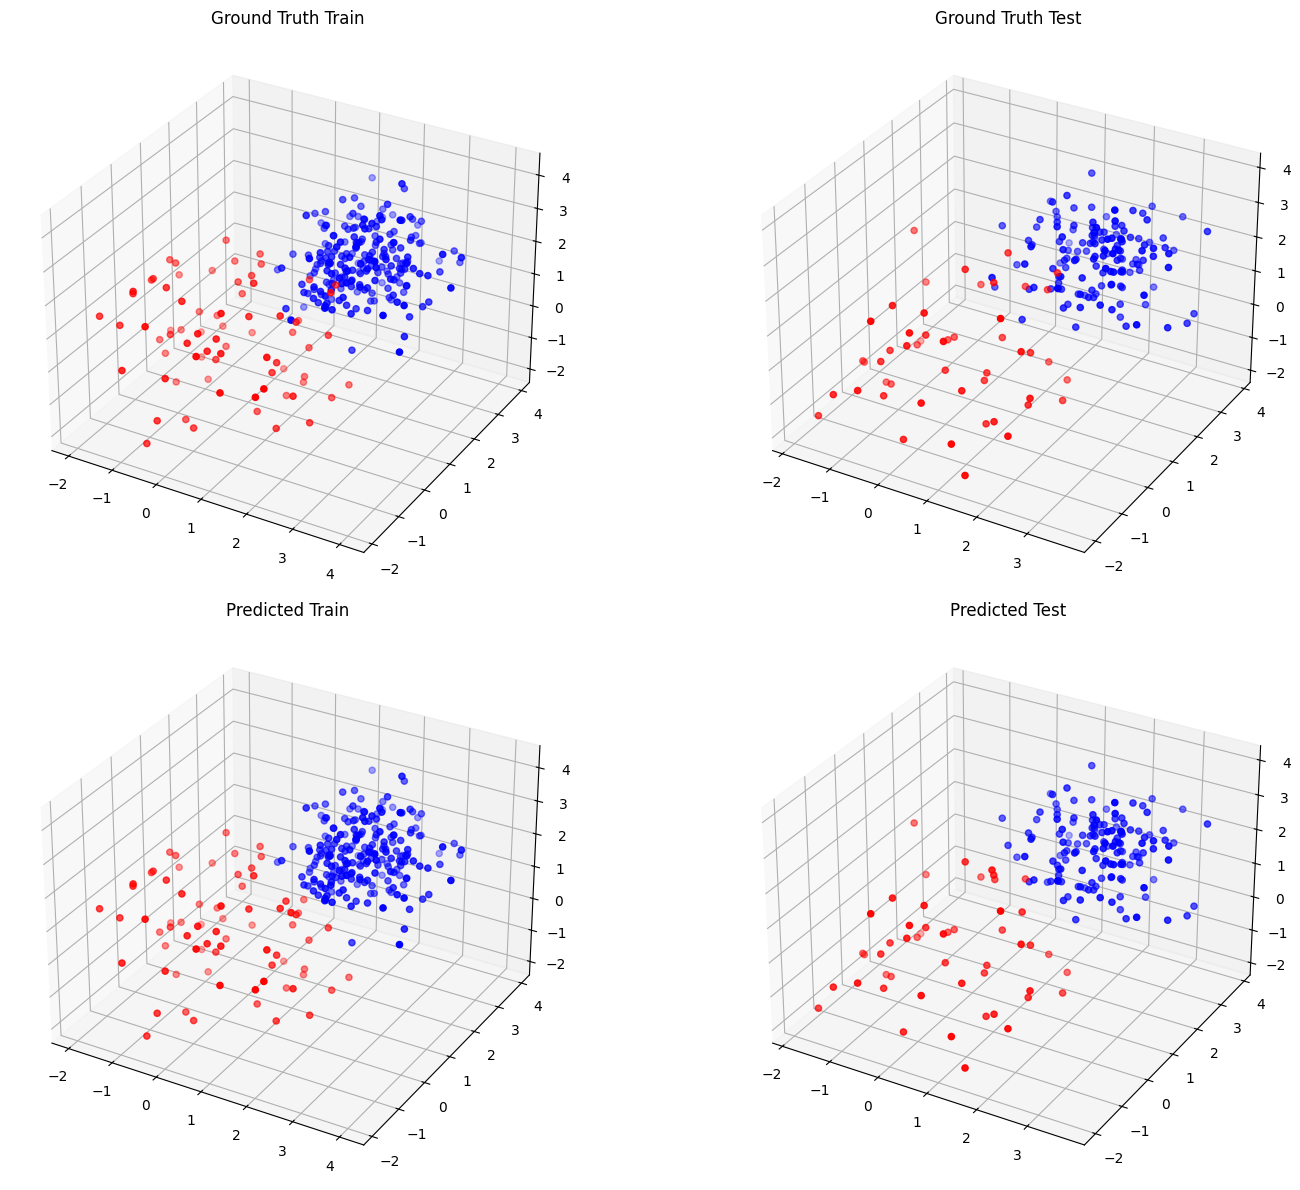

In [75]:
#Ex 1.3

def ploturi_1(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test, y_train_pred=y_train_pred,y_test_pred=y_test_pred):
  fig = plt.figure(figsize=(16, 12))
  #ax = fig.add_subplot(111, projection='3d')

  #1 Ground Truth Train
  ax1 = fig.add_subplot(221, projection='3d')  # 2x2 grid, position 1

  x_in=x_train[y_train==0]
  x_out=x_train[y_train==1]
  ax1.scatter(x_in[:,0],x_in[:,1],x_in[:,2], color='blue')
  ax1.scatter(x_out[:,0],x_out[:,1],x_out[:,2], color='red')
  ax1.set_title("Ground Truth Train")


  #2 Ground Truth Test
  ax2 = fig.add_subplot(222, projection='3d')

  x_in=x_test[y_test==0]
  x_out=x_test[y_test==1]
  ax2.scatter(x_in[:,0],x_in[:,1],x_in[:,2], color='blue')
  ax2.scatter(x_out[:,0],x_out[:,1],x_out[:,2], color='red')
  ax2.set_title("Ground Truth Test")

  #3 Prediction Train
  ax3 = fig.add_subplot(223, projection='3d')

  x_in=x_train[y_train_pred==0]
  x_out=x_train[y_train_pred==1]
  ax3.scatter(x_in[:,0],x_in[:,1],x_in[:,2], color='blue')
  ax3.scatter(x_out[:,0],x_out[:,1],x_out[:,2], color='red')
  ax3.set_title("Predicted Train")

  #2 Predicted Test
  ax4 = fig.add_subplot(224, projection='3d')  # 2x2 grid, position 1

  x_in=x_test[y_test_pred==0]
  x_out=x_test[y_test_pred==1]
  ax4.scatter(x_in[:,0],x_in[:,1],x_in[:,2], color='blue')
  ax4.scatter(x_out[:,0],x_out[:,1],x_out[:,2], color='red')
  ax4.set_title("Predicted Test")

  plt.tight_layout()
  plt.show()

ploturi_1()



Pentru OCSVM cu kernel RBF:
 Balanced Accuracy = 0.8500000000000001
 AUC = 0.9293333333333332


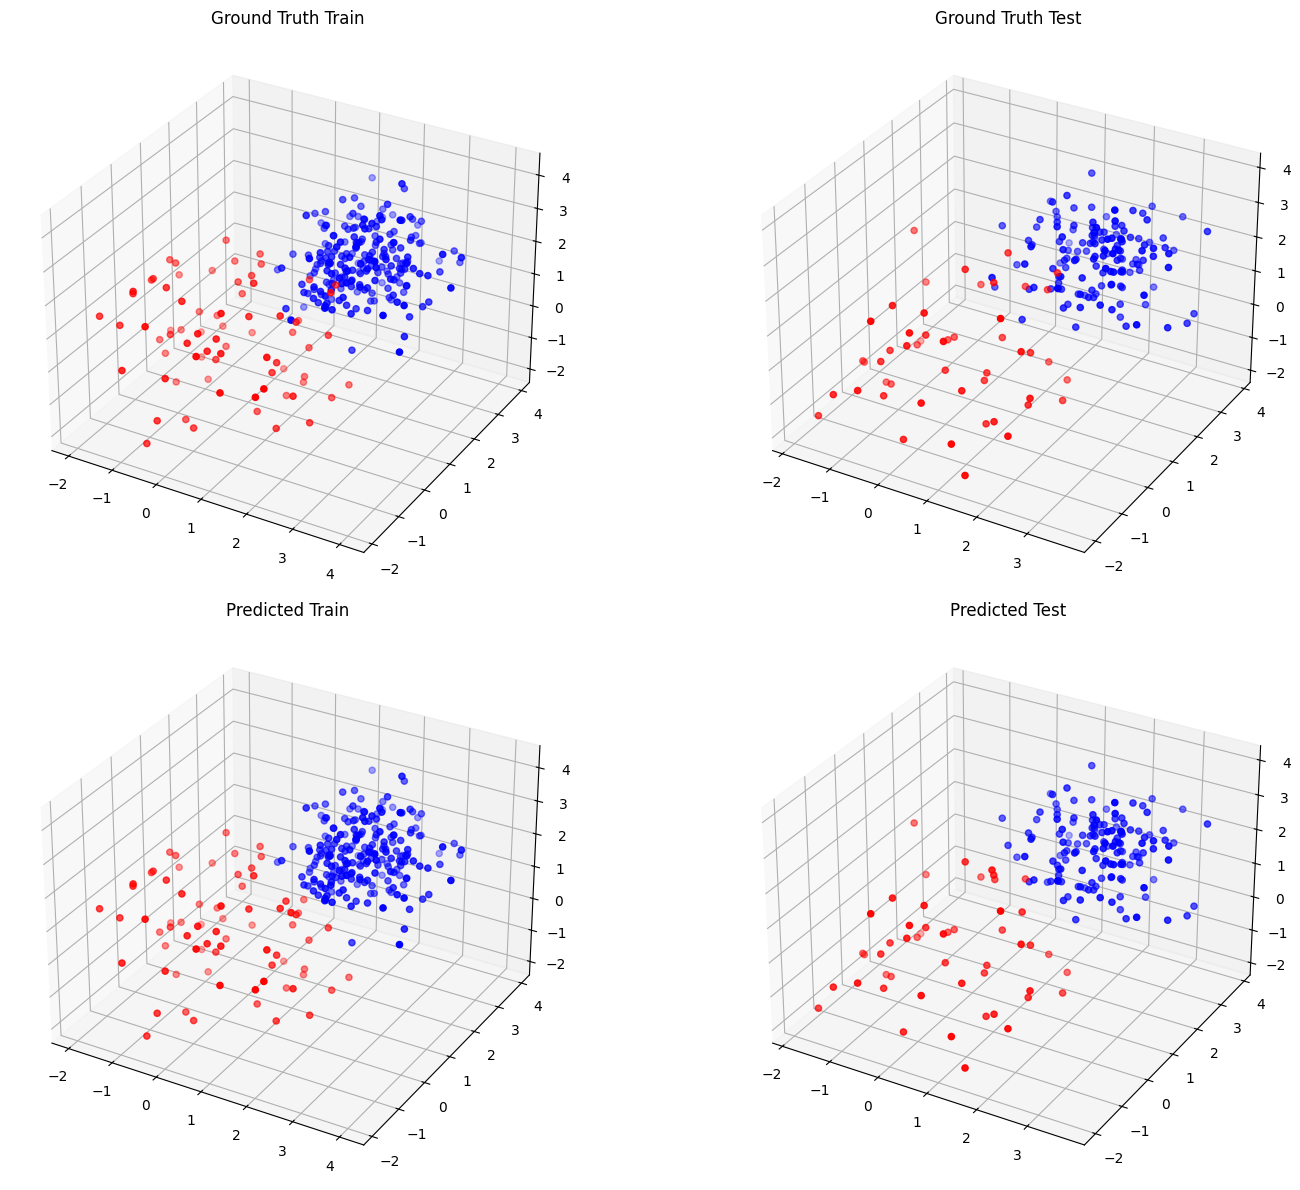

In [76]:
#Ex 1.4
ba,auc,y_train_pred,y_test_pred=Model(OCSVM,kernel='rbf')

print("\nPentru OCSVM cu kernel RBF:\n Balanced Accuracy = {}\n AUC = {}".format(ba,auc))
ploturi_1()



Epoch 1/100, Loss: 8.685992807149887
Epoch 2/100, Loss: 9.365573585033417
Epoch 3/100, Loss: 8.954732358455658
Epoch 4/100, Loss: 9.09123408794403
Epoch 5/100, Loss: 8.887403964996338
Epoch 6/100, Loss: 9.129323899745941
Epoch 7/100, Loss: 8.870016098022461
Epoch 8/100, Loss: 9.48696494102478
Epoch 9/100, Loss: 8.872617304325104
Epoch 10/100, Loss: 9.10928189754486
Epoch 11/100, Loss: 9.299853920936584
Epoch 12/100, Loss: 9.19184285402298
Epoch 13/100, Loss: 9.521738290786743
Epoch 14/100, Loss: 9.059446334838867
Epoch 15/100, Loss: 8.929378747940063
Epoch 16/100, Loss: 8.858487486839294
Epoch 17/100, Loss: 9.111913442611694
Epoch 18/100, Loss: 8.850926458835602
Epoch 19/100, Loss: 8.752528727054596
Epoch 20/100, Loss: 9.011625289916992
Epoch 21/100, Loss: 8.971914559602737
Epoch 22/100, Loss: 8.868616431951523
Epoch 23/100, Loss: 9.152088642120361
Epoch 24/100, Loss: 8.765598326921463
Epoch 25/100, Loss: 9.10526156425476
Epoch 26/100, Loss: 8.908260703086853
Epoch 27/100, Loss: 8.7851

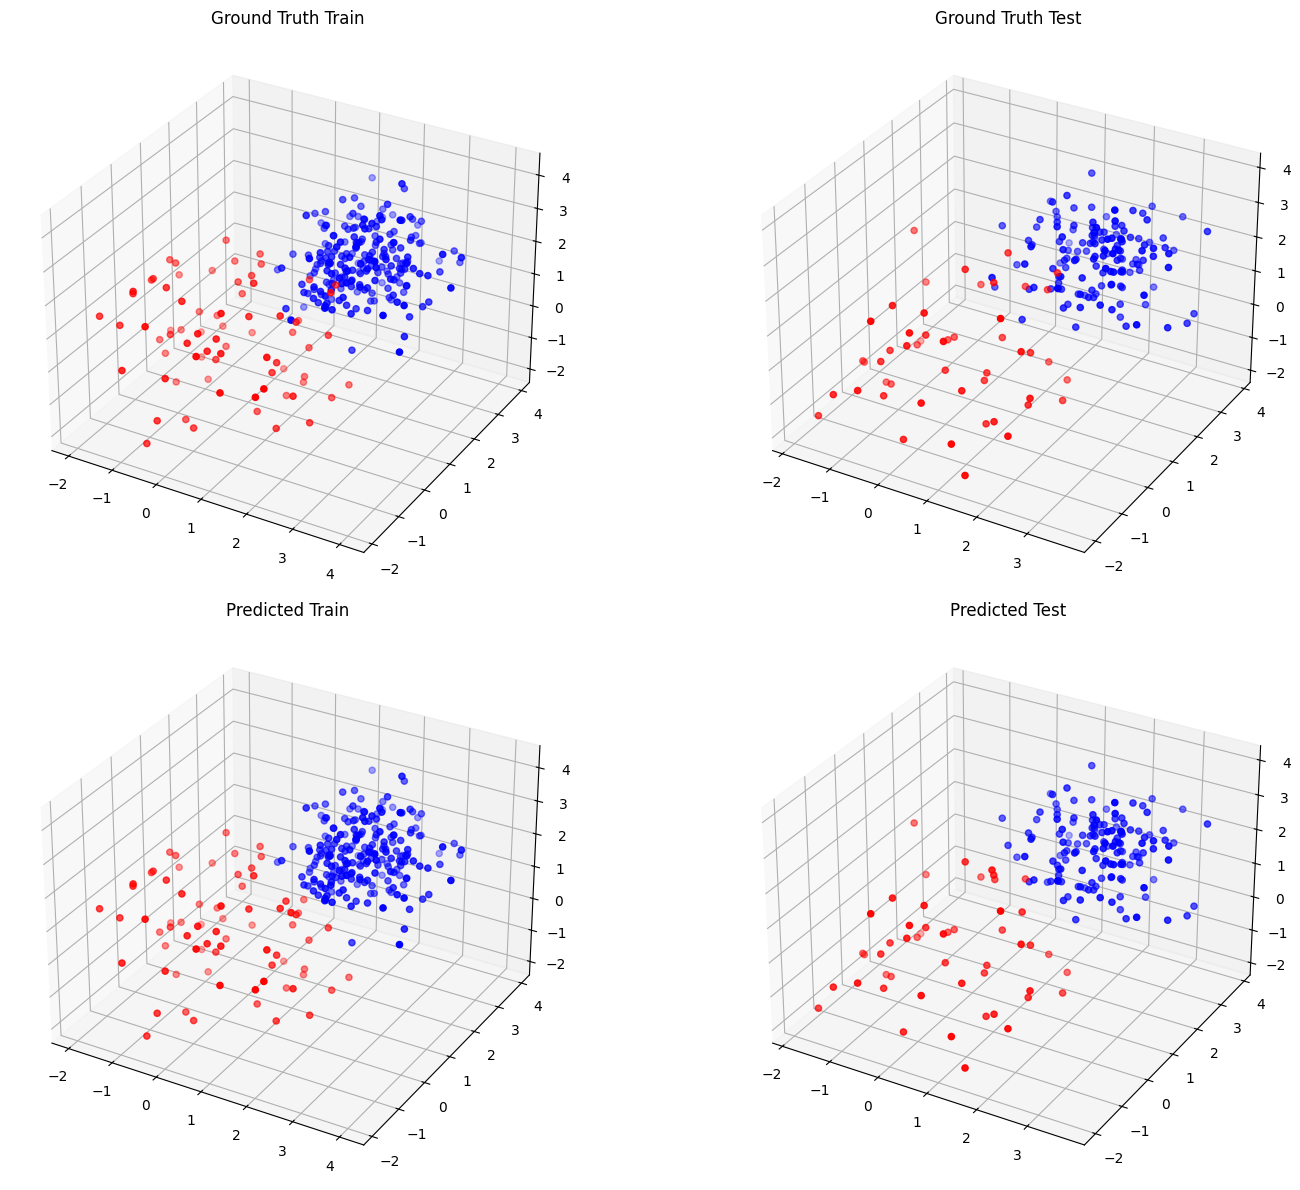

In [77]:
#Ex 1.5
ba,auc,y_train_pred,y_test_pred=Model(DeepSVDD)

print("\nPentru DeepSVDD :\n Balanced Accuracy = {}\n AUC = {}".format(ba,auc))
ploturi_1()


In [78]:
#EX 2.1

#Dau load la datele mele si le split-uiesc
data = loadmat('cardio.mat')

print(data.keys())

X = data['X']  # replace 'X' with the correct key if different
y = data['y']  # replace 'y' with the correct key if different

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


#x_train, x_test = standardizer(x_train, x_test)

p_train,p_test=y_train[y_train==1].shape[0]/y_train.shape[0], y_test[y_test==1].shape[0]/y_test.shape[0]

print("{:.4f} % din Train sunt anomalii. \n {:.4f} % din Test sunt anomalii. \n".format(p_train*100,p_test*100))



dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X_train shape: (732, 21)
X_test shape: (1099, 21)
y_train shape: (732, 1)
y_test shape: (1099, 1)
9.8361 % din Train sunt anomalii. 
 9.4631 % din Test sunt anomalii. 



In [79]:
#Ex 2.2
from sklearn.utils import shuffle


scaler = StandardScaler()

#Convertesc in -1 si 1 scorurile de in/outliere.

y_train_sklearn = -(y_train * 2 - 1)
y_test_sklearn = -(y_test * 2 - 1)

#Definesc Gridul
param_grid = {
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': ['scale','auto', 0.1, 0.01, 0.001],
    'svc__nu': [p_train,p_train*1.05,p_train*0.95, 0.1, 0.2, 0.5, 0.7,],
}

# Pipeline ul
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('svc', OneClassSVM())
])

# Grid search-ul
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=3  # 3-fold cross-validation
)


grid_search.fit(x_train, y_train_sklearn)

best_params = grid_search.best_params_
print("\nCea mai buna combinatie de parametrii este urmatoarea:\n", best_params)



Cea mai buna combinatie de parametrii este urmatoarea:
 {'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'svc__nu': 0.2}


In [81]:

best_model = grid_search.best_estimator_
print(best_model)

# PRedictia celui mai bun model:
y_test_pred_sklearn = best_model.predict(x_test)
#print(y_test_sklearn)

# BA pentru cel mai bun model
balanced_acc = balanced_accuracy_score(y_test_sklearn, y_test_pred_sklearn)
print("\nBA pentru cel mai bun model: {:.4f}".format(balanced_acc))

ba,_,_,_=Model(OCSVM,kernel='linear',gamma='scale',nu=p_train)
print("\nAlt model are performanta asa, semnificativ mai slaba: {:.4f}".format(ba))


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', OneClassSVM(gamma=0.001, nu=0.2))])

BA pentru cel mai bun model: 0.8560

Alt model are performanta asa, semnificativ mai slaba: 0.5769


In [24]:
#Ex 3.1

data = loadmat('shuttle.mat')
i=1
print(data.keys())

X = data['X']  # replace 'X' with the correct key if different
y = data['y']  # replace 'y' with the correct key if different

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

x_train, x_test = standardizer(x_train, x_test)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


p_train,p_test=y_train[y_train==1].shape[0]/y_train.shape[0], y_test[y_test==1].shape[0]/y_test.shape[0]
cont=p_train


print("\n {:.4f} % din Train sunt anomalii. \n {:.4f} % din Test sunt anomalii. \n".format(p_train*100,p_test*100))



dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
x_train shape: (24548, 9)
x_test shape: (24549, 9)
y_train shape: (24548, 1)
y_test shape: (24549, 1)

 7.0719 % din Train sunt anomalii. 
 7.2304 % din Test sunt anomalii. 



In [25]:
#Ex 3.2

#OCSVM

ba,auc,y_train_pred,y_test_pred=Model(OCSVM,cont=cont)
print("\nPentru OCSVM cu kernel Linear:\n Balanced Accuracy = {}\n AUC = {}".format(ba,auc))

#DeepSVDD
ba1,auc1,y_train_pred,y_test_pred=Model(DeepSVDD,cont=cont,n_features=x_train.shape[1])
print("\nPentru DeepSVDD clasic:\n Balanced Accuracy = {}\n AUC = {}".format(ba1,auc1))





Pentru OCSVM cu kernel Linear:
 Balanced Accuracy = 0.5262192987555614
 AUC = 0.535804481760149
Epoch 1/100, Loss: 621.7632032334805
Epoch 2/100, Loss: 621.2361987531185
Epoch 3/100, Loss: 621.1733552590013
Epoch 4/100, Loss: 621.2452075183392
Epoch 5/100, Loss: 621.2592243999243
Epoch 6/100, Loss: 621.5012891292572
Epoch 7/100, Loss: 621.7378133833408
Epoch 8/100, Loss: 621.319157242775
Epoch 9/100, Loss: 621.4675475209951
Epoch 10/100, Loss: 621.444836974144
Epoch 11/100, Loss: 621.4779371470213
Epoch 12/100, Loss: 621.6056070625782
Epoch 13/100, Loss: 621.4198352694511
Epoch 14/100, Loss: 621.4470732957125
Epoch 15/100, Loss: 621.3724818229675
Epoch 16/100, Loss: 622.3221442699432
Epoch 17/100, Loss: 622.3141829073429
Epoch 18/100, Loss: 621.4541970491409
Epoch 19/100, Loss: 621.7626415491104
Epoch 20/100, Loss: 621.6422553211451
Epoch 21/100, Loss: 621.9754780679941
Epoch 22/100, Loss: 621.2437542825937
Epoch 23/100, Loss: 621.4525537341833
Epoch 24/100, Loss: 621.5652318000793
Ep

In [26]:
#Ex 3.3


ba0,auc0,y_train_pred,y_test_pred=Model(OCSVM,kernel='rbf',cont=cont)
print("\nPentru OCSVM cu kernel RBF:\n Balanced Accuracy = {}\n AUC = {}".format(ba0,auc0))

ba2,auc2,y_train_pred,y_test_pred=Model(DeepSVDD,cont=cont,n_features=x_train.shape[1],hidden_neurons=[64,32,16],dropout_rate=0.15)
#print("\nPentru DeepSVDD varianta 2:\n Balanced Accuracy = {}\n AUC = {}".format(ba2,auc2))

ba3,auc3,y_train_pred,y_test_pred=Model(DeepSVDD,cont=cont,n_features=x_train.shape[1],hidden_neurons=[64,32,16],dropout_rate=0.3)
#print("\nPentru DeepSVDD varianta 3:\n Balanced Accuracy = {}\n AUC = {}".format(ba3,auc3))

ba4,auc4,y_train_pred,y_test_pred=Model(DeepSVDD,cont=cont,n_features=x_train.shape[1],hidden_neurons=[64,32,16],dropout_rate=0.15,hidden_activation='leaky_relu')
#print("\nPentru DeepSVDD varianta 4:\n Balanced Accuracy = {}\n AUC = {}".format(ba4,auc4))



Pentru OCSVM cu kernel RBF:
 Balanced Accuracy = 0.9752949805622175
 AUC = 0.9910029846241761
Epoch 1/100, Loss: 115.8352078832686
Epoch 2/100, Loss: 116.21204839833081
Epoch 3/100, Loss: 110.83957387320697
Epoch 4/100, Loss: 110.40008558519185
Epoch 5/100, Loss: 106.56646030768752
Epoch 6/100, Loss: 115.00806707702577
Epoch 7/100, Loss: 109.86537580937147
Epoch 8/100, Loss: 113.68207613378763
Epoch 9/100, Loss: 110.00072279386222
Epoch 10/100, Loss: 105.96034841053188
Epoch 11/100, Loss: 114.05232849530876
Epoch 12/100, Loss: 113.35016960650682
Epoch 13/100, Loss: 108.79357712902129
Epoch 14/100, Loss: 108.4068121407181
Epoch 15/100, Loss: 111.78887551277876
Epoch 16/100, Loss: 114.69187946617603
Epoch 17/100, Loss: 120.07661597058177
Epoch 18/100, Loss: 113.89181316271424
Epoch 19/100, Loss: 118.46613463386893
Epoch 20/100, Loss: 118.0113325882703
Epoch 21/100, Loss: 115.31955545768142
Epoch 22/100, Loss: 113.85844813100994
Epoch 23/100, Loss: 108.86516173556447
Epoch 24/100, Loss: 

In [27]:
print("\nPentru DeepSVDD varianta 2:\n Balanced Accuracy = {}\n AUC = {}".format(ba2,auc2))
print("\nPentru DeepSVDD varianta 3:\n Balanced Accuracy = {}\n AUC = {}".format(ba3,auc3))
print("\nPentru DeepSVDD varianta 4:\n Balanced Accuracy = {}\n AUC = {}".format(ba4,auc4))



Pentru DeepSVDD varianta 2:
 Balanced Accuracy = 0.9404710709148189
 AUC = 0.9810218719889373

Pentru DeepSVDD varianta 3:
 Balanced Accuracy = 0.9509888716685817
 AUC = 0.9875332507913026

Pentru DeepSVDD varianta 4:
 Balanced Accuracy = 0.9747096454197213
 AUC = 0.9911883949698013
